<a href="https://colab.research.google.com/github/oulbacha-ilyas/Machine-Learning-For-Stock-Market-Prediction/blob/main/experiment6dasaset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Data Preprocessing

In [ ]:
####Selecting the best structure


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Normalizer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import statistics
from datetime import datetime


dataset=pd.read_csv("fixations.csv")
fixationX=dataset[["start timestamp [ns]","end timestamp [ns]","duration [ms]","fixation x [px]"]]

facebook=pd.read_csv("Facebook.csv")
apple=pd.read_csv("Apple.csv")
amazon=pd.read_csv("Amazon.csv")
netflix=pd.read_csv("Netflix.csv")
google=pd.read_csv("Google.csv")


### replacing missing values
mean = facebook['Open'].mean()
facebook['Open'].fillna(mean, inplace=True)
mean = facebook['High'].mean()
facebook['High'].fillna(mean, inplace=True)
mean = facebook['Low'].mean()
facebook['Low'].fillna(mean, inplace=True)
mean = facebook['Close'].mean()
facebook['Close'].fillna(mean, inplace=True)
mean = facebook['Adj Close'].mean()
facebook['Adj Close'].fillna(mean, inplace=True)
mean = facebook['Volume'].mean()
facebook['Volume'].fillna(mean, inplace=True)

mean = apple['Open'].mean()
apple['Open'].fillna(mean, inplace=True)
mean = apple['High'].mean()
apple['High'].fillna(mean, inplace=True)
mean = apple['Low'].mean()
apple['Low'].fillna(mean, inplace=True)
mean = apple['Close'].mean()
apple['Close'].fillna(mean, inplace=True)
mean = apple['Adj Close'].mean()
apple['Adj Close'].fillna(mean, inplace=True)
mean = apple['Volume'].mean()
apple['Volume'].fillna(mean, inplace=True)

mean = amazon['Open'].mean()
amazon['Open'].fillna(mean, inplace=True)
mean = amazon['High'].mean()
amazon['High'].fillna(mean, inplace=True)
mean = amazon['Low'].mean()
amazon['Low'].fillna(mean, inplace=True)
mean = amazon['Close'].mean()
amazon['Close'].fillna(mean, inplace=True)
mean = amazon['Adj Close'].mean()
amazon['Adj Close'].fillna(mean, inplace=True)
mean = amazon['Volume'].mean()
amazon['Volume'].fillna(mean, inplace=True)

mean = netflix['Open'].mean()
netflix['Open'].fillna(mean, inplace=True)
mean = netflix['High'].mean()
netflix['High'].fillna(mean, inplace=True)
mean = netflix['Low'].mean()
netflix['Low'].fillna(mean, inplace=True)
mean = netflix['Close'].mean()
netflix['Close'].fillna(mean, inplace=True)
mean = netflix['Adj Close'].mean()
netflix['Adj Close'].fillna(mean, inplace=True)
mean = netflix['Volume'].mean()
netflix['Volume'].fillna(mean, inplace=True)

mean = google['Open'].mean()
google['Open'].fillna(mean, inplace=True)
mean = google['High'].mean()
google['High'].fillna(mean, inplace=True)
mean = google['Low'].mean()
google['Low'].fillna(mean, inplace=True)
mean = google['Close'].mean()
google['Close'].fillna(mean, inplace=True)
mean = google['Adj Close'].mean()
google['Adj Close'].fillna(mean, inplace=True)
mean = google['Volume'].mean()
google['Volume'].fillna(mean, inplace=True)


facebook['Date']=facebook['Date'].astype('string')
amazon['Date']=amazon['Date'].astype('string')
apple['Date']=apple['Date'].astype('string')
netflix['Date']=netflix['Date'].astype('string')
google['Date']=google['Date'].astype('string')



### changing date to timestamp
format = "%Y-%m-%d"
facebook['timestamp']=np.nan

for i in facebook.index:
  date_string = facebook.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  facebook.iloc[i,7]=timestamp

facebook['Date']=facebook['timestamp']
facebook=facebook.drop(['timestamp'],axis=1)
facebook= facebook.rename(columns = {"Date":"Timestamp"})
facebook.head()

#####
format = "%Y-%m-%d"
amazon['timestamp']=np.nan

for i in amazon.index:
  date_string = amazon.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  amazon.iloc[i,7]=timestamp

amazon['Date']=amazon['timestamp']
amazon=amazon.drop(['timestamp'],axis=1)
amazon= amazon.rename(columns = {"Date":"Timestamp"})
amazon.head()

format = "%Y-%m-%d"
apple['timestamp']=np.nan

for i in apple.index:
  date_string = apple.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  apple.iloc[i,7]=timestamp

apple['Date']=apple['timestamp']
apple=apple.drop(['timestamp'],axis=1)
apple= apple.rename(columns = {"Date":"Timestamp"})
apple.head()

format = "%Y-%m-%d"
netflix['timestamp']=np.nan

for i in netflix.index:
  date_string = netflix.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  netflix.iloc[i,7]=timestamp

netflix['Date']=netflix['timestamp']
netflix=netflix.drop(['timestamp'],axis=1)
netflix= netflix.rename(columns = {"Date":"Timestamp"})
netflix.head()

format = "%Y-%m-%d"
google['timestamp']=np.nan

for i in google.index:
  date_string = google.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  google.iloc[i,7]=timestamp

google['Date']=google['timestamp']
google=google.drop(['timestamp'],axis=1)
google= google.rename(columns = {"Date":"Timestamp"})
google.head()



fixationX.describe()
#####


,start timestamp [ns],end timestamp [ns],duration [ms],fixation x [px]
count,1.023000e+03,1.023000e+03,1023.000000,1023.000000
mean,1.649869e+18,1.649869e+18,475.372434,573.489254
std,1.749428e+11,1.749531e+11,576.859891,134.203456
min,1.649868e+18,1.649868e+18,63.000000,151.086000
25%,1.649868e+18,1.649868e+18,216.000000,485.183500
50%,1.649869e+18,1.649869e+18,324.000000,537.795000
75%,1.649869e+18,1.649869e+18,542.000000,670.053000
max,1.649869e+18,1.649869e+18,10239.000000,1026.711000


# 2) Machine Learning Models Comparison

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

   Data Size  Missing Values     RMSE LR Adjusted R2    RMSE ANN Difference  \
0        0.1             0.1  133.665791    0.004814   158.68359  25.017799   
1        0.2             0.2  133.626919    0.005425  159.572572  25.945653   
2        0.3             0.3  133.564435    0.005295  162.914569  29.350133   
3        0.4             0.4  133.633103    0.004782  148.922395  15.289293   
4        0.5             0.5   133.64063    0.005194  159.532766  25.892137   
5        0.6             0.6  133.588373    0.005482  159.666116  26.077743   
6        0.7             0.7  133.386316    0.007314  155.258222  21.871905   
7        0.8             0.8  133.957253    0.003536  161.595045  27.637792   
8        0.9             0.9  133.428773    0.005737     142.076   8.647227   

                 stdev  
0  174234887575.790436  
1  170628116687.633575  
2  162581654137.083466  
3   149604070598.72113  
4   128698801914.73822  
5  102649544340.490036  
6   71509148242.220291  
7    3603

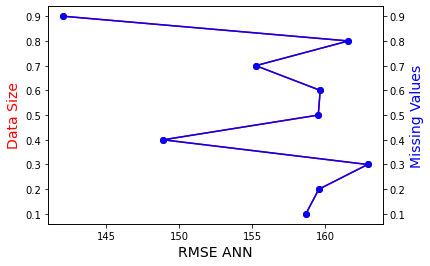

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]


fixationX=fixationX

results_fix=pd.DataFrame(columns=['Data Size','Missing Values','RMSE LR','Adjusted R2','RMSE ANN','Difference','stdev'])
results_fix['Data Size']=sizes
results_fix['Missing Values']=sizes

#


for i in range(9):

  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_sample=fixationX.sample(n=round(1023*sizes[i]))
  fixationX_missing=fixationX_sample.sample(n=round(1023*sizes[i]*sizes[i]))
  
  ##Get the mean value of the non missing values
  list_not_missing=[]
  for j in range(1023) :
    if j not in fixationX_missing.index :
      list_not_missing.append(j)

  not_missing=pd.DataFrame(columns=fixationX.columns)
  for k in list_not_missing:
    not_missing=not_missing.append(fixationX.iloc[k,:])

  not_missing_mean=statistics.mean(not_missing["start timestamp [ns]"])
  #print("not missing mean",not_missing_mean)

  ## Assign the mean to the missing values
  
  for l in  fixationX_missing.index :
    fixationX.loc[l,"start timestamp [ns]"]=not_missing_mean
  
  new_mean=statistics.mean(fixationX["start timestamp [ns]"])

  #print("dataset new mean =",new_mean)

  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}'.format(sizes[i]))
  #plt.show()

  ######training the models
  ###Linear Regression
  X=fixationX[["start timestamp [ns]","duration [ms]"]]
  y=fixationX['fixation x [px]']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  
  results_fix.iloc[i,2]=rmse_test
  results_fix.iloc[i,3]=adj_r2
  
  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test['start timestamp [ns]']
  #b = X_test['end timestamp [ns]']
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Vs Test Fixation, Missing Values ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  results_fix.iloc[i,4]=rmse_test

  #variance of the target variable in the missing values sample
  results_fix.iloc[i,6]=statistics.stdev(fixationX["start timestamp [ns]"])

  i+=1


results_fix['Difference']=results_fix['RMSE ANN']-results_fix['RMSE LR']
print(results_fix)

missing_s=['a','b','c','d','e','f','g','h','i']
fig,ax = plt.subplots()
# make a plot
ax.plot(results_fix['RMSE ANN'],results_fix['Data Size'],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("RMSE ANN", fontsize = 14)
# set y-axis label
ax.set_ylabel("Data Size",
              color="red",
              fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(results_fix['RMSE ANN'], results_fix['Missing Values'],color="blue",marker="o")
ax2.set_ylabel("Missing Values",color="blue",fontsize=14)
plt.show()

   Data Size  Missing Values          RMSE LR Adjusted R2         RMSE ANN  \
0        0.1             0.1  21230504.728455    0.202125   19671743.89265   
1        0.2             0.2  21383788.314134    0.198103  21236852.648708   
2        0.3             0.3  21848239.061653    0.180407  25013485.723293   
3        0.4             0.4  22175113.444954    0.162905  22644644.909704   
4        0.5             0.5  22625204.945788    0.134082  21300080.784465   
5        0.6             0.6  23130723.882534    0.101111  25013485.724349   
6        0.7             0.7  23787778.104985    0.070312  25013485.638075   
7        0.8             0.8  24302662.889332    0.046934  24099757.068943   
8        0.9             0.9  24624384.065738    0.022886  24107383.503993   

       Difference      stdev  
0 -1558760.835805  61.538343  
1  -146935.665426  61.418338  
2   3165246.66164  61.079359  
3   469531.464751  60.269674  
4 -1325124.161323  58.269907  
5  1882761.841815   54.82886  
6 

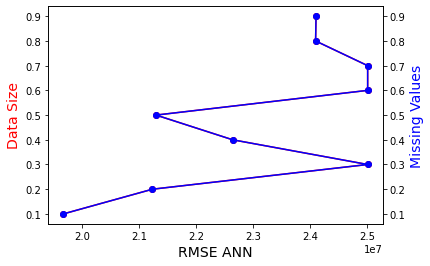

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]



fixationX=facebook
results_fb=pd.DataFrame(columns=['Data Size','Missing Values','RMSE LR','Adjusted R2','RMSE ANN','Difference','stdev'])
results_fb['Data Size']=sizes
results_fb['Missing Values']=sizes

#


for i in range(9):

  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_sample=fixationX.sample(n=round(1023*sizes[i]))
  fixationX_missing=fixationX_sample.sample(n=round(1023*sizes[i]*sizes[i]))
  
  ##Get the mean value of the non missing values
  list_not_missing=[]
  for j in range(1023) :
    if j not in fixationX_missing.index :
      list_not_missing.append(j)

  not_missing=pd.DataFrame(columns=fixationX.columns)
  for k in list_not_missing:
    not_missing=not_missing.append(fixationX.iloc[k,:])

  not_missing_mean=statistics.mean(not_missing["Close"])
  #print("not missing mean",not_missing_mean)

  ## Assign the mean to the missing values
  
  for l in  fixationX_missing.index :
    fixationX.loc[l,"Close"]=not_missing_mean
  
  new_mean=statistics.mean(fixationX["Close"])

  #print("dataset new mean =",new_mean)

  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}'.format(sizes[i]))
  #plt.show()

  ######training the models
  ###Linear Regression
  X=fixationX[["Close"]]
  y=fixationX['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  
  results_fb.iloc[i,2]=rmse_test
  results_fb.iloc[i,3]=adj_r2
  
  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test['start timestamp [ns]']
  #b = X_test['end timestamp [ns]']
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Vs Test Fixation, Missing Values ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  results_fb.iloc[i,4]=rmse_test

  #variance of the target variable in the missing values sample
  results_fb.iloc[i,6]=statistics.stdev(facebook["Close"])

  i+=1


results_fb['Difference']=results_fb['RMSE ANN']-results_fb['RMSE LR']
print(results_fb)

missing_s=['a','b','c','d','e','f','g','h','i']
fig,ax = plt.subplots()
# make a plot
ax.plot(results_fb['RMSE ANN'],results_fb['Data Size'],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("RMSE ANN", fontsize = 14)
# set y-axis label
ax.set_ylabel("Data Size",
              color="red",
              fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(results_fb['RMSE ANN'], results_fb['Missing Values'],color="blue",marker="o")
ax2.set_ylabel("Missing Values",color="blue",fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

   Data Size  Missing Values         RMSE LR Adjusted R2        RMSE ANN  \
0        0.1             0.1  7277898.660602    0.054105  7132972.603329   
1        0.2             0.2  7279342.606479    0.053557   6999860.13218   
2        0.3             0.3  7284193.017246    0.052266  7088660.972205   
3        0.4             0.4  7295676.089484    0.050036  7122547.485884   
4        0.5             0.5  7305651.952426    0.047451  7088284.434042   
5        0.6             0.6  7316054.994709    0.044049  7093382.584535   
6        0.7             0.7  7332864.389551    0.039788  7260468.563447   
7        0.8             0.8  7350554.032003    0.034265  7274004.391939   
8        0.9             0.9  7374750.534364    0.028694  7214675.779559   

      Difference       stdev  
0 -144926.057273  596.092914  
1 -279482.474299  593.748213  
2 -195532.045041  590.110141  
3   -173128.6036  582.478978  
4 -217367.518384  576.400228  
5 -222672.410174  563.753549  
6  -72395.826104  550.

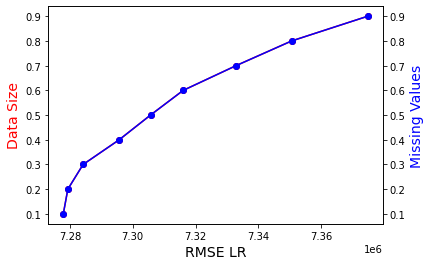

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]



fixationX=amazon
results_am=pd.DataFrame(columns=['Data Size','Missing Values','RMSE LR','Adjusted R2','RMSE ANN','Difference','stdev'])
results_am['Data Size']=sizes
results_am['Missing Values']=sizes

#


for i in range(9):

  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_sample=fixationX.sample(n=round(1023*sizes[i]))
  fixationX_missing=fixationX_sample.sample(n=round(1023*sizes[i]*sizes[i]))
  
  ##Get the mean value of the non missing values
  list_not_missing=[]
  for j in range(1023) :
    if j not in fixationX_missing.index :
      list_not_missing.append(j)

  not_missing=pd.DataFrame(columns=fixationX.columns)
  for k in list_not_missing:
    not_missing=not_missing.append(fixationX.iloc[k,:])

  not_missing_mean=statistics.mean(not_missing["Close"])
  #print("not missing mean",not_missing_mean)

  ## Assign the mean to the missing values
  
  for l in  fixationX_missing.index :
    fixationX.loc[l,"Close"]=not_missing_mean
  
  new_mean=statistics.mean(fixationX["Close"])

  #print("dataset new mean =",new_mean)

  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}'.format(sizes[i]))
  #plt.show()

  ######training the models
  ###Linear Regression
  X=fixationX[["Close"]]
  y=fixationX['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  
  results_am.iloc[i,2]=rmse_test
  results_am.iloc[i,3]=adj_r2
  
  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test['start timestamp [ns]']
  #b = X_test['end timestamp [ns]']
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Vs Test Fixation, Missing Values ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  results_am.iloc[i,4]=rmse_test

  #variance of the target variable in the missing values sample
  results_am.iloc[i,6]=statistics.stdev(amazon["Close"])

  i+=1


results_am['Difference']=results_am['RMSE ANN']-results_am['RMSE LR']
print(results_am)

missing_s=['a','b','c','d','e','f','g','h','i']
fig,ax = plt.subplots()
# make a plot
ax.plot(results_am['RMSE LR'],results_am['Data Size'],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("RMSE LR", fontsize = 14)
# set y-axis label
ax.set_ylabel("Data Size",
              color="red",
              fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(results_am['RMSE LR'], results_am['Missing Values'],color="blue",marker="o")
ax2.set_ylabel("Missing Values",color="blue",fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

   Data Size  Missing Values           RMSE LR Adjusted R2          RMSE ANN  \
0        0.1             0.1  362101087.605252    0.020221  365607789.979047   
1        0.2             0.2   362084706.98845    0.020064   299136947.70829   
2        0.3             0.3   362094240.35583    0.019804  356224057.871642   
3        0.4             0.4  362220391.497348    0.018728  355554341.169342   
4        0.5             0.5  362343983.088732    0.017915  364426124.416385   
5        0.6             0.6  362568041.532934    0.016868  361274113.283454   
6        0.7             0.7  362835490.499543    0.015341  365415487.392702   
7        0.8             0.8  362980652.657457    0.014393  360086619.281263   
8        0.9             0.9  363470963.419225    0.012504  365410851.824104   

       Difference      stdev  
0  3506702.373795  16.867706  
1 -62947759.28016  16.799238  
2 -5870182.484188  16.744423  
3 -6666050.328006  16.572897  
4  2082141.327653  16.387643  
5 -1293928.24

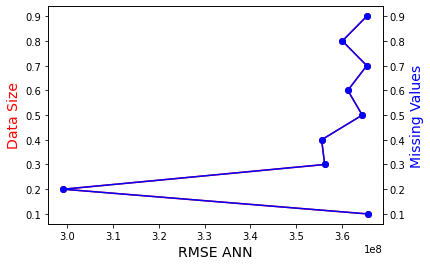

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]



fixationX=apple
results_ap=pd.DataFrame(columns=['Data Size','Missing Values','RMSE LR','Adjusted R2','RMSE ANN','Difference','stdev'])
results_ap['Data Size']=sizes
results_ap['Missing Values']=sizes

#


for i in range(9):

  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_sample=fixationX.sample(n=round(1023*sizes[i]))
  fixationX_missing=fixationX_sample.sample(n=round(1023*sizes[i]*sizes[i]))
  
  ##Get the mean value of the non missing values
  list_not_missing=[]
  for j in range(1023) :
    if j not in fixationX_missing.index :
      list_not_missing.append(j)

  not_missing=pd.DataFrame(columns=fixationX.columns)
  for k in list_not_missing:
    not_missing=not_missing.append(fixationX.iloc[k,:])

  not_missing_mean=statistics.mean(not_missing["Close"])
  #print("not missing mean",not_missing_mean)

  ## Assign the mean to the missing values
  
  for l in  fixationX_missing.index :
    fixationX.loc[l,"Close"]=not_missing_mean
  
  new_mean=statistics.mean(fixationX["Close"])

  #print("dataset new mean =",new_mean)

  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}'.format(sizes[i]))
  #plt.show()

  ######training the models
  ###Linear Regression
  X=fixationX[["Close"]]
  y=fixationX['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  
  results_ap.iloc[i,2]=rmse_test
  results_ap.iloc[i,3]=adj_r2
  
  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test['start timestamp [ns]']
  #b = X_test['end timestamp [ns]']
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Vs Test Fixation, Missing Values ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  results_ap.iloc[i,4]=rmse_test

  #variance of the target variable in the missing values sample
  results_ap.iloc[i,6]=statistics.stdev(apple["Close"])

  i+=1


results_ap['Difference']=results_ap['RMSE ANN']-results_ap['RMSE LR']
print(results_ap)

missing_s=['a','b','c','d','e','f','g','h','i']
fig,ax = plt.subplots()
# make a plot
ax.plot(results_ap['RMSE ANN'],results_ap['Data Size'],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("RMSE ANN", fontsize = 14)
# set y-axis label
ax.set_ylabel("Data Size",
              color="red",
              fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(results_ap['RMSE ANN'], results_ap['Missing Values'],color="blue",marker="o")
ax2.set_ylabel("Missing Values",color="blue",fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


   Data Size  Missing Values          RMSE LR Adjusted R2         RMSE ANN  \
0        0.1             0.1  16441453.638595    0.037174  16814114.050615   
1        0.2             0.2  16452836.582176    0.036687   16814114.05024   
2        0.3             0.3  16475714.923114    0.035352  16781671.638769   
3        0.4             0.4  16491580.526318    0.033618  16814114.050621   
4        0.5             0.5  16533181.262563    0.030596   16814114.05057   
5        0.6             0.6  16593758.280943    0.026646  15289587.258378   
6        0.7             0.7  16629691.032976    0.021773  16770518.076529   
7        0.8             0.8   16664743.38932    0.017767  16814114.050509   
8        0.9             0.9  16727850.999251    0.013257  16830419.720298   

       Difference       stdev  
0   372660.412019  118.349911  
1   361277.468064   118.17867  
2   305956.715655  117.003538  
3   322533.524303  115.663595  
4   280932.788008  113.320035  
5 -1304171.022565  109.7437

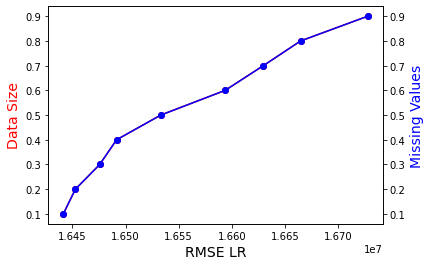

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]



fixationX=netflix
results_nt=pd.DataFrame(columns=['Data Size','Missing Values','RMSE LR','Adjusted R2','RMSE ANN','Difference','stdev'])
results_nt['Data Size']=sizes
results_nt['Missing Values']=sizes

#


for i in range(9):

  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_sample=fixationX.sample(n=round(1023*sizes[i]))
  fixationX_missing=fixationX_sample.sample(n=round(1023*sizes[i]*sizes[i]))
  
  ##Get the mean value of the non missing values
  list_not_missing=[]
  for j in range(1023) :
    if j not in fixationX_missing.index :
      list_not_missing.append(j)

  not_missing=pd.DataFrame(columns=fixationX.columns)
  for k in list_not_missing:
    not_missing=not_missing.append(fixationX.iloc[k,:])

  not_missing_mean=statistics.mean(not_missing["Close"])
  #print("not missing mean",not_missing_mean)

  ## Assign the mean to the missing values
  
  for l in  fixationX_missing.index :
    fixationX.loc[l,"Close"]=not_missing_mean
  
  new_mean=statistics.mean(fixationX["Close"])

  #print("dataset new mean =",new_mean)

  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}'.format(sizes[i]))
  #plt.show()

  ######training the models
  ###Linear Regression
  X=fixationX[["Close"]]
  y=fixationX['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  
  results_nt.iloc[i,2]=rmse_test
  results_nt.iloc[i,3]=adj_r2
  
  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test['start timestamp [ns]']
  #b = X_test['end timestamp [ns]']
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Vs Test Fixation, Missing Values ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  results_nt.iloc[i,4]=rmse_test

  #variance of the target variable in the missing values sample
  results_nt.iloc[i,6]=statistics.stdev(netflix["Close"])

  i+=1


results_nt['Difference']=results_nt['RMSE ANN']-results_nt['RMSE LR']
print(results_nt)

missing_s=['a','b','c','d','e','f','g','h','i']
fig,ax = plt.subplots()
# make a plot
ax.plot(results_nt['RMSE LR'],results_nt['Data Size'],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("RMSE LR", fontsize = 14)
# set y-axis label
ax.set_ylabel("Data Size",
              color="red",
              fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(results_nt['RMSE LR'], results_nt['Missing Values'],color="blue",marker="o")
ax2.set_ylabel("Missing Values",color="blue",fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

   Data Size  Missing Values         RMSE LR Adjusted R2        RMSE ANN  \
0        0.1             0.1   7219272.03191     0.08984  7144289.496988   
1        0.2             0.2  7224735.198276     0.08882  7050091.320734   
2        0.3             0.3  7233144.243868    0.086359   7037842.30524   
3        0.4             0.4  7244026.077222    0.081756  7173727.207549   
4        0.5             0.5  7267785.983458    0.076041  7108794.431578   
5        0.6             0.6  7295958.442386    0.068284   7237122.88112   
6        0.7             0.7  7356967.076553    0.058113  7394504.630614   
7        0.8             0.8  7395755.355093    0.047392  7411524.560325   
8        0.9             0.9  7431424.949425    0.036469  7434510.888864   

      Difference       stdev  
0  -74982.534922  118.435303  
1 -174643.877541  118.435303  
2 -195301.938628  118.435303  
3  -70298.869673  118.435303  
4 -158991.551879  118.435303  
5  -58835.561266  118.435303  
6   37537.554061  118.

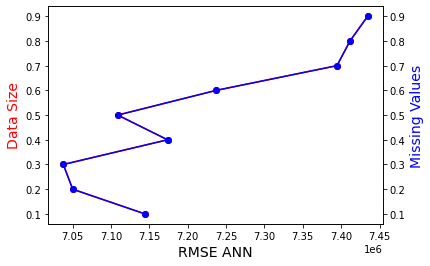

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]



fixationX=google
results_gg=pd.DataFrame(columns=['Data Size','Missing Values','RMSE LR','Adjusted R2','RMSE ANN','Difference','stdev'])
results_gg['Data Size']=sizes
results_gg['Missing Values']=sizes

#


for i in range(9):

  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_sample=fixationX.sample(n=round(1023*sizes[i]))
  fixationX_missing=fixationX_sample.sample(n=round(1023*sizes[i]*sizes[i]))
  
  ##Get the mean value of the non missing values
  list_not_missing=[]
  for j in range(1023) :
    if j not in fixationX_missing.index :
      list_not_missing.append(j)

  not_missing=pd.DataFrame(columns=fixationX.columns)
  for k in list_not_missing:
    not_missing=not_missing.append(fixationX.iloc[k,:])

  not_missing_mean=statistics.mean(not_missing["Close"])
  #print("not missing mean",not_missing_mean)

  ## Assign the mean to the missing values
  
  for l in  fixationX_missing.index :
    fixationX.loc[l,"Close"]=not_missing_mean
  
  new_mean=statistics.mean(fixationX["Close"])

  #print("dataset new mean =",new_mean)

  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}'.format(sizes[i]))
  #plt.show()

  ######training the models
  ###Linear Regression
  X=fixationX[["Close"]]
  y=fixationX['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  
  results_gg.iloc[i,2]=rmse_test
  results_gg.iloc[i,3]=adj_r2
  
  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test['start timestamp [ns]']
  #b = X_test['end timestamp [ns]']
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Vs Test Fixation, Missing Values ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  results_gg.iloc[i,4]=rmse_test

  #variance of the target variable in the missing values sample
  results_gg.iloc[i,6]=statistics.stdev(netflix["Close"])

  i+=1


results_gg['Difference']=results_gg['RMSE ANN']-results_gg['RMSE LR']
print(results_gg)

missing_s=['a','b','c','d','e','f','g','h','i']
fig,ax = plt.subplots()
# make a plot
ax.plot(results_gg['RMSE ANN'],results_gg['Data Size'],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("RMSE ANN", fontsize = 14)
# set y-axis label
ax.set_ylabel("Data Size",
              color="red",
              fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(results_gg['RMSE ANN'], results_gg['Missing Values'],color="blue",marker="o")
ax2.set_ylabel("Missing Values",color="blue",fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

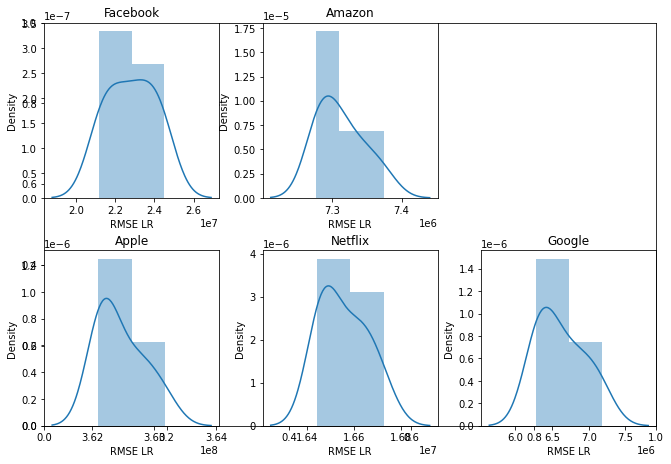

In [ ]:
from matplotlib.pylab import title
from scipy.stats import shapiro
from scipy.stats import kstest
import matplotlib.gridspec as gridspec

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots()
gs = gridspec.GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

sns.distplot(results_fb['RMSE LR'],ax=ax1).set(title="Facebook")
sns.distplot(results_am['RMSE LR'],ax=ax2).set(title="Amazon")
sns.distplot(results_ap['RMSE LR'],ax=ax3).set(title="Apple")
sns.distplot(results_nt['RMSE LR'],ax=ax4).set(title="Netflix")
sns.distplot(results_gg['RMSE LR'],ax=ax5).set(title="Google")
fig.set_figheight(7)
fig.set_figwidth(10)

plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)


In [ ]:
#perform Kolmogorov-Smirnov test


normality=pd.DataFrame(columns=['Dataset','S-W statistic','S-W p-value','K-S statistic','K-S p-value'])
normality['Dataset']=['Facebook','Apple','Amazon','Netflix','Google']



#s1,p1=shapiro(results_fix['RMSE LR'])
s2,p2=shapiro(results_fb['RMSE LR'])
s3,p3=shapiro(results_ap['RMSE LR'])
s4,p4=shapiro(results_am['RMSE LR'])
s5,p5=shapiro(results_nt['RMSE LR'])
s6,p6=shapiro(results_gg['RMSE LR'])


normality['S-W statistic']=[s2,s3,s4,s5,s6]
normality['S-W p-value']=[p2,p3,p4,p5,p6]

#fix=results_fix['RMSE LR'].values.tolist()
fb=results_fb['RMSE LR'].values.tolist()
ap=results_ap['RMSE LR'].values.tolist()
am=results_am['RMSE LR'].values.tolist()
nt=results_nt['RMSE LR'].values.tolist()
gg=results_gg['RMSE LR'].values.tolist()

#s1,p1=kstest(fix, 'norm')
s2,p2=kstest(fb, 'norm')
s3,p3=kstest(ap, 'norm')
s4,p4=kstest(am, 'norm')
s5,p5=kstest(nt, 'norm')
s6,p6=kstest(gg, 'norm')

normality['K-S statistic']=[s2,s3,s4,s5,s6]
normality['K-S p-value']=[p2,p3,p4,p5,p6]

print(normality)


    Dataset  S-W statistic  S-W p-value  K-S statistic  K-S p-value
0  Facebook       0.940317     0.585244            1.0          0.0
1     Apple       0.878693     0.152121            1.0          0.0
2    Amazon       0.916160     0.361394            1.0          0.0
3   Netflix       0.927066     0.453920            1.0          0.0
4    Google       0.908352     0.304507            1.0          0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

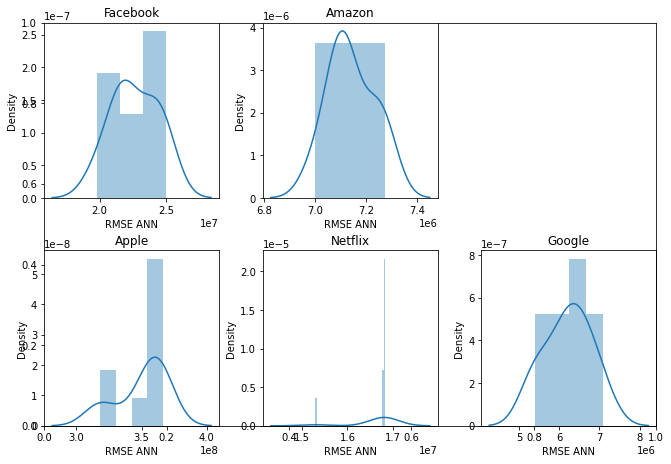

In [ ]:
from matplotlib.pylab import title
from scipy.stats import shapiro
from scipy.stats import kstest
import matplotlib.gridspec as gridspec

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots()
gs = gridspec.GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

sns.distplot(results_fb['RMSE ANN'],ax=ax1).set(title="Facebook")
sns.distplot(results_am['RMSE ANN'],ax=ax2).set(title="Amazon")
sns.distplot(results_ap['RMSE ANN'],ax=ax3).set(title="Apple")
sns.distplot(results_nt['RMSE ANN'],ax=ax4).set(title="Netflix")
sns.distplot(results_gg['RMSE ANN'],ax=ax5).set(title="Google")
fig.set_figheight(7)
fig.set_figwidth(10)

plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)


In [ ]:
#perform Kolmogorov-Smirnov test

#s1,p1=shapiro(results_fix['RMSE ANN'])
s2,p2=shapiro(results_fb['RMSE ANN'])
s3,p3=shapiro(results_ap['RMSE ANN'])
s4,p4=shapiro(results_am['RMSE ANN'])
s5,p5=shapiro(results_nt['RMSE ANN'])
s6,p6=shapiro(results_gg['RMSE ANN'])

normality=pd.DataFrame()
normality['Dataset']=['Facebook','Apple','Amazon','Netflix','Google']
normality['S-W statistic']=[s2,s3,s4,s5,s6]
normality['S-W p-value']=[p2,p3,p4,p5,p6]

#fix=results_fix['RMSE ANN'].values.tolist()
fb=results_fb['RMSE ANN'].values.tolist()
ap=results_ap['RMSE ANN'].values.tolist()
am=results_am['RMSE ANN'].values.tolist()
nt=results_nt['RMSE ANN'].values.tolist()
gg=results_gg['RMSE ANN'].values.tolist()

#s1,p1=kstest(fix, 'norm')
s2,p2=kstest(fb, 'norm')
s3,p3=kstest(ap, 'norm')
s4,p4=kstest(am, 'norm')
s5,p5=kstest(nt, 'norm')
s6,p6=kstest(gg, 'norm')

normality['K-S statistic']=[s2,s3,s4,s5,s6]
normality['K-S p-value']=[p2,p3,p4,p5,p6]

print(normality)


    Dataset  S-W statistic   S-W p-value  K-S statistic  K-S p-value
0  Facebook       0.944496  6.299362e-01            1.0          0.0
1     Apple       0.765571  8.210886e-03            1.0          0.0
2    Amazon       0.923571  4.226268e-01            1.0          0.0
3   Netflix       0.420029  7.307833e-07            1.0          0.0
4    Google       0.948146  6.697218e-01            1.0          0.0


In [ ]:
lr=pd.DataFrame()
#lr['fix']=results_fix.iloc[:,2]
lr['fb']=results_fb.iloc[:,2]
lr['ap']=results_ap.iloc[:,2]
lr['am']=results_am.iloc[:,2]
lr['nt']=results_nt.iloc[:,2]
lr['gg']=results_gg.iloc[:,2]
ann=pd.DataFrame()
#ann['fix']=results_fix.iloc[:,4]
ann['fb']=results_fb.iloc[:,4]
ann['ap']=results_ap.iloc[:,4]
ann['am']=results_am.iloc[:,4]
ann['nt']=results_nt.iloc[:,4]
ann['gg']=results_gg.iloc[:,4]



wilcoxon_test=pd.DataFrame(columns=['Dataset','Wilcoxon statistic','p-value'])
dataset=['Facebook','Apple','Amazon','Netflix','Google']
for i in range(5):
  s1=lr.iloc[:,i].values.flatten()
  s2=ann.iloc[:,i].values.flatten()
  s,p=stats.wilcoxon(s1,s2)
  wilcoxon_test=wilcoxon_test.append({'Dataset':dataset[i],'Wilcoxon statistic':s,'p-value':p},ignore_index=True)
print(wilcoxon_test)


    Dataset  Wilcoxon statistic   p-value
0  Facebook                16.0  0.496094
1     Apple                 8.0  0.097656
2    Amazon                 0.0  0.003906
3   Netflix                 9.0  0.128906
4    Google                 1.0  0.007812


In [ ]:
###multicomparison
friedman_test=pd.DataFrame(columns=['Model','Friedman statistic','p-value'])

statistic,pvalue=stats.friedmanchisquare(lr['fb'],lr['ap'],lr['am'],lr['nt'],lr['gg'])
friedman_test=friedman_test.append({'Model':'LR in all datasets','Friedman statistic':statistic,'p-value':pvalue},ignore_index=True)


statistic,pvalue=stats.friedmanchisquare(ann['fb'],ann['ap'],ann['am'],ann['nt'],ann['gg'])
friedman_test=friedman_test.append({'Model':'ANN in all datasets','Friedman statistic':statistic,'p-value':pvalue},ignore_index=True)


print(friedman_test)


                 Model  Friedman statistic       p-value
0   LR in all datasets                36.0  2.893696e-07
1  ANN in all datasets                36.0  2.893696e-07
